In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle , Circle
import seaborn as sns

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


In [2]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

In [3]:

# gt = pd.read_csv('gt.txt',names=['frame', 'id', 'x1', 'y1', 'w', 'h', 'c_r', 'l', 'conf'])
# gt['x'], gt['y'] = ( gt.x1 + gt.x2 ) /2 , (gt.y1 + gt.y2) /2

In [4]:
gt = pd.read_csv('results.csv',names=['frame', 'id', 'x1', 'y1', 'x2', 'y2', 'c_r', 'l', 'conf','b'])
 
gt['x'], gt['y'] = ( gt.x1 + gt.x2 ) /2 , (gt.y1 + gt.y2) /2

In [5]:
gt
unique_id_count = gt['id'].nunique()
print(unique_id_count)

2021


In [6]:
def transform(xy):
    H = np.array([[ 1.50888127e-03, -5.00588358e-02,  2.74125767e+01],
       [ 1.84526705e-02,  1.13249660e-02, -1.71440251e+01],
       [ 3.69061384e-05,  1.49356499e-03,  1.00000000e+00]])
    z = np.ones((xy.shape[0],1))
    xyz = np.hstack((xy, z))
    trans = H @ xyz.T
    trans[:2] = trans[:2] / trans[2]
    return trans[:2]
 
gt['x'], gt[ 'y'] = transform(gt[['x', 'y']])

In [8]:
unique_ids = gt['id'].unique()[:50]

# Extract the rows corresponding to the first 100 unique IDs
gt = gt[gt['id'].isin(unique_ids)]

In [10]:
traj_len = 100  # set length of each trajectory
n_clusters = 5
XTrain = np.zeros((0, traj_len , 2) )  #
for i, g in gt.groupby('id'):  #
    traj = g[['x', 'y']].to_numpy()  #
    while traj.shape[0] >= traj_len:  # It's used to segment the trajectory into smaller parts if it's longer than traj_len
        XTrain = np.concatenate((XTrain, traj[:traj_len].reshape(1,traj_len , 2)))    #his line takes the first traj_len points from the
                                                                                        #trajectory and reshapes this segment into a 3D array with shape (1, traj_len, 2)
        traj = traj[traj_len:]




XDIFF = XTrain[:, :-1, :] - XTrain[:, 1:, :]
XDIFF = XDIFF.reshape(-1, (traj_len - 1 ) * 2)  # The result of this operation, stored in XDIFF, is a 3D NumPy array where each element [i, j, :] represents the
print(XDIFF)                                        #difference  in the x and y coordinates between the j+1th and jth points of the ith trajectory.




[[-6.26364922e-02  1.81012677e-02 -6.42163836e-03 ... -3.81349138e-02
   4.38299662e-02 -6.07978894e-02]
 [-2.03390007e-01  1.95575910e-02 -6.97820019e-02 ...  5.23996969e-02
   1.44782224e-01 -4.64811414e-02]
 [-2.98603075e-02  1.88359885e-02  9.76722996e-02 ... -5.49797457e-02
   1.22839066e-01 -4.17324694e-02]
 ...
 [ 4.45064379e-02 -3.74213428e-02 -6.36772324e-02 ...  4.07246196e-02
   3.75604326e-02  7.13793236e-04]
 [-5.13423182e-02  1.30670711e-02  7.83568103e-02 ...  4.02549261e-02
   1.87009739e-02 -1.69008745e-03]
 [ 3.75648742e-01 -5.82888722e-02  2.35118582e-01 ...  8.48457873e-02
   1.34710916e+00 -1.79732099e-01]]


In [ ]:
# ##Normalization
# scaler = MinMaxScaler()
# XDIFF = pd.DataFrame(scaler.fit_transform(XDIFF))
# print(XDIFF)

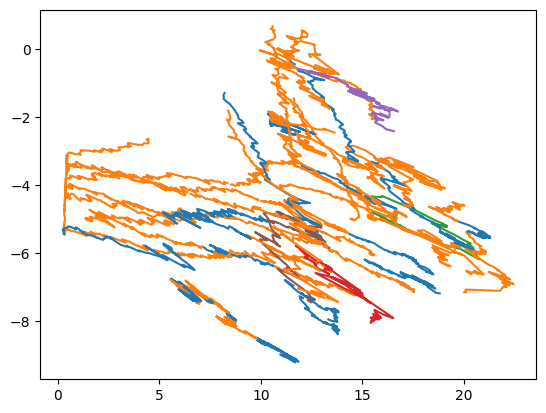

In [11]:
kmeans = cluster.KMeans(init="k-means++", n_clusters=6, n_init=7, random_state=456)
kmeans.fit(XDIFF )

centers = kmeans.cluster_centers_
y_pred = kmeans.labels_
XTrain = XTrain.reshape(-1, traj_len, 2)
for i in range(XTrain.shape[0]):
    plt.plot(XTrain[i, :, 0], XTrain[i, :, 1], c=sns.color_palette()[y_pred[i]])

In [12]:
silhouette_avg = silhouette_score(XDIFF, y_pred)

# Print the silhouette score
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.015296246232771033


In [ ]:
elbow method

In [ ]:
Silhoette plot for 